In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
# Import data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv')
data.drop(
    ['url','region_url', 'image_url', 'description', 'lat', 'long'],
    axis=1,
    inplace=True
  )

This block removes the top outliers making the data impossible to understand.
We have enough data to just remove them because things like 1000 bedrooms
does not make sense. We have enough data to not worry about these outliers.

In [ ]:
# Clean Data
# data.price.fillna(data.price.mean())

# replace 0's with median
# data.price = data.price.replace(0, data.price.median())
# data.sqfeet = data.sqfeet.replace(0, data.sqfeet.median())
# We probably have enough data to just remove the data with 0 housing price...

# Remove lower outliers
lower = data.price.quantile(0.01)
data = data[data.price > lower]

lower = data.sqfeet.quantile(0.01)
data = data[data.sqfeet > lower]

# Remove the upper outliers
upper = data.price.quantile(0.99)
data = data[data.price < upper]

upper = data.sqfeet.quantile(0.99)
data = data[data.sqfeet < upper]

upper = data.beds.quantile(0.99)
data = data[data.beds < upper]

<Figure size 720x720 with 0 Axes>

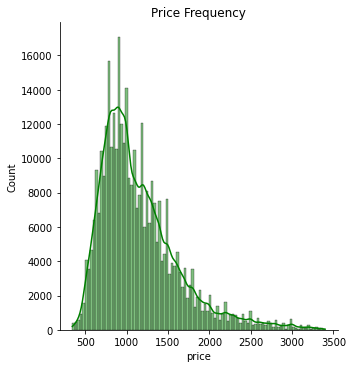

In [ ]:
# Visualize housing prices
# data.price.hist(bins='auto')
plt.figure(figsize=(10,10))
sns.displot(data.price, kde=True, color ='green', bins=100).set(title='Price Frequency')

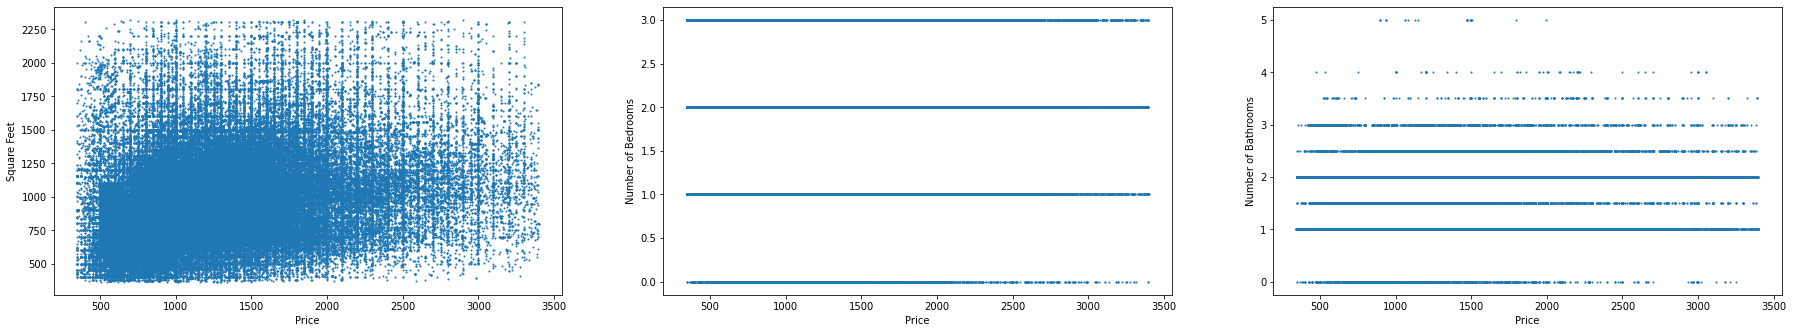

In [ ]:
# How price compares to some data points
plt.subplots_adjust(left=2, right=6, bottom=2, top=3)

# Price by square feet
plt.subplot(1, 3, 1)
plt.scatter(data.price, data.sqfeet, s=1)
plt.xlabel('Price')
plt.ylabel('Square Feet')

# Price by number of bedrooms
plt.subplot(1, 3, 2)
plt.scatter(data.price, data.beds, s=1)
plt.xlabel('Price')
plt.ylabel('Number of Bedrooms')

# Price by number of bathrooms
plt.subplot(1, 3, 3)
plt.scatter(data.price, data.baths, s=1)
plt.xlabel('Price')
plt.ylabel('Number of Bathrooms')

plt.show()

This plot groups the data by region and sorts the data by the average price to see how each region compares to other regions.

In [ ]:
plt.subplots_adjust(left=2, right=6, bottom=0, top=20, wspace=0, hspace=0)

# Average price by region
group_by_region = data.groupby('region', as_index=False).price.mean()
group_by_region = group_by_region.sort_values(by='price', ascending=False)
# plt.subplot(1, 3, 1)
# plt.barh(group_by_region.region, group_by_region.price)

<Figure size 432x288 with 0 Axes>

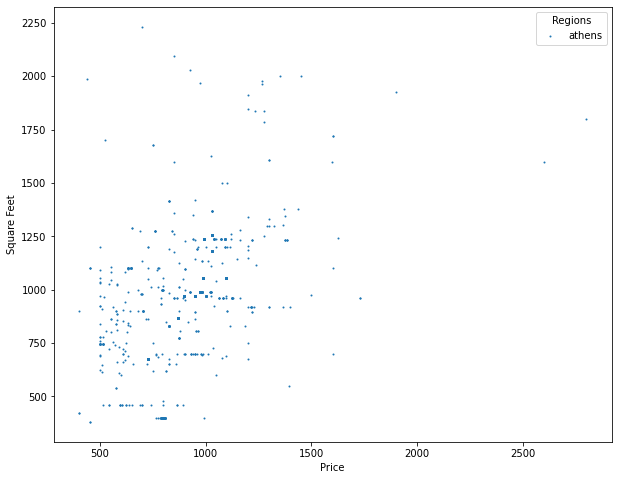

In [ ]:
group_by_region = data.groupby('region')
fig, ax = plt.subplots(figsize=(10,8))
for label, group in group_by_region:
  # ax.scatter(group.price, group.sqfeet, label=label, s=1)

  # update find_region to show results for a specific region

  find_region = 'athens'
  if (label == find_region):
    ax.scatter(group.price, group.sqfeet, label=label, s=1)
    plt.xlabel('Price')
    plt.ylabel('Square Feet')
    break

ax.legend(title='Regions')
# plt.show()

**Populate region_selection with the targeted region**

---

Chosing a region will show you the results for the targeted region since sifting through all of the data is a bit more difficult to understand.



In [ ]:
region_selection = 'atlanta'

In [ ]:
# sklearn decision tree regressor
import graphviz
from sklearn.utils import shuffle

grouped_region = data.groupby('region')

predictions = {}
region_selection_predicitons = []
region_selection_real_values = []
region_selection_group = None
region_selection_model = None

# Adding the region to pdf selection will create a pdf of the decision
# tree created
for label, group in grouped_region:
  X = group.drop(['id', 'region', 'type', 'laundry_options', 'parking_options', 'state', 'price'], axis=1)
  y = group['price']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  # Shuffle data to prevent overfitting and negative cross_val scores
  X_train, y_train = shuffle(X_train, y_train)

  model = DecisionTreeRegressor()
  model.fit(X_train, y_train)
  label_predictions = model.predict(X_test)

  predictions[label] = label_predictions

  if (label == region_selection):
    dot_data = tree.export_graphviz(model, out_file=None)
    graph = graphviz.Source(dot_data)
    graph.render(label)

    region_selection_predicitons = label_predictions
    region_selection_X_test = X_test
    region_selection_y_test = y_test
    region_selection_group = group
    region_selection_model = model



Here we can see the results of the training using the test data, predictions, and the true values for x that we stored earlier.

note: This shows the results for just the selected region. It is possible to see the overall results by coding it that way but we are focusing in on specific
regions to have the data make more sense to a human reader.

[0.75350527 0.46695438 0.5674081  0.39082495 0.43664575 0.42394327
 0.63554608 0.60619821 0.69532414 0.59810562 0.36824994 0.29411709]


Text(0, 0.5, 'Square Feet')

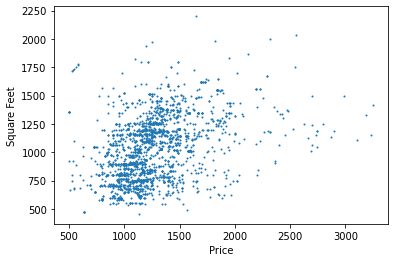

In [ ]:
# print(region_selection_predicitons)
# print(region_selection_real_values.values)
from sklearn.model_selection import cross_val_score

# print(type(region_selection_predicitons))
# print(type(region_selection_real_values.values))

score = cross_val_score(
    region_selection_model,
    region_selection_X_test,
    region_selection_predicitons,
    cv=12) #12 folds
print(score)

plt.scatter(region_selection_group.price, region_selection_group.sqfeet, s=1)
plt.xlabel('Price')
plt.ylabel('Square Feet')